<a href="https://colab.research.google.com/github/rahiakela/probabilistic-programming-practice/blob/main/bayesian-analysis-with-python/2-programming-probabilistically/1_pymc3_primer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##PyMC3 primer

PyMC3 is a Python library for probabilistic programming.It provides a very simple and intuitive syntax that is easy to read and that is close to the syntax used in the statistical literature to describe probabilistic models.

##Setup

In [6]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import pandas as pd
import seaborn as sns
import pymc3 as pm
import arviz as az

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
az.style.use('arviz-darkgrid')

##Flipping coins the PyMC3 way

Let's revisit the coin-flipping problem, but this time using PyMC3. We will use the same synthetic data.Since we are generating the data, we know the true value of $\theta$.

In [3]:
np.random.seed(123)
trials = 4
theta_real = 0.35   # unknown value in a real experiment
data = stats.bernoulli.rvs(p=theta_real, size=trials)
data

array([1, 0, 0, 0])

##Model specification

Now that we have the data, we need to specify the model. Remember that this is done by specifying the likelihood and the prior using probability distributions. For the likelihood, we will use the binomial distribution with $n=1$ and $p=\theta$,and for the prior, a beta distribution with the parameters $\alpha=\beta=1$.

A beta distribution with such parameters is equivalent to a uniform distribution in the interval `[0, 1]`.

$$\theta \sim Beta(\alpha, \beta)$$
$$y \sim Bern(p=\theta)$$

This statistical model has an almost one-to-one translation to PyMC3:

In [7]:
with pm.Model() as model:
  # a priori
  θ = pm.Beta("θ", alpha=1., beta=.1)
  # likelihood
  y = pm.Bernoulli("y", p=θ, observed=data)
  trace = pm.sample(1000, random_seed=123)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [θ]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 2 seconds.


The first and second lines tell us that PyMC3 has automatically assigned the NUTS sampler (one inference engine that works very well for continuous variables), and has used a method to initialize that sampler. The third line says that PyMC3 will run two chains in parallel, thus we will get two independent samples from the posterior for the price of one.

##Summarizing the posterior

Generally, the first task we will perform after sampling from the posterior is check what the results look like. 

The `plot_trace` function from ArviZ is ideally suited to this task:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f02b33ff190>,
      dtype=object)

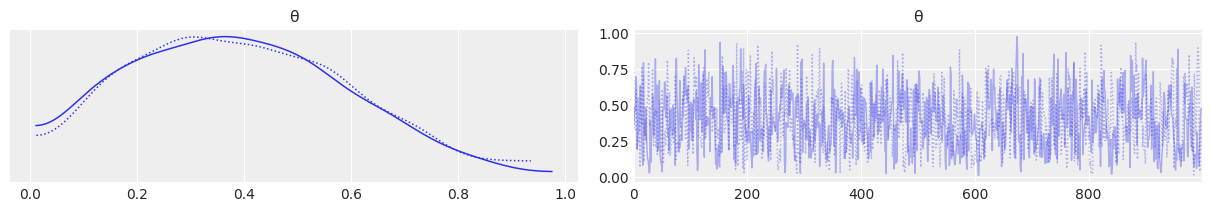

In [8]:
az.plot_trace(trace)

We get two subplots for each unobserved variable. The only unobserved variable in our model is $\theta$ . Notice that y is an observed variable representing
the data; we do not need to sample that because we already know those values.

On the left, we have a Kernel Density Estimation (KDE)
plot; this is like the smooth version of the histogram. On the right, we get the individual
sampled values at each step during the sampling. From the trace plot, we can visually get
the plausible values from the posterior.

We may also want to have a numerical summary of the trace. We can get
that using az.summary, which will return a pandas DataFrame:

In [9]:
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
θ,0.391,0.197,0.063,0.756,0.007,0.005,841.0,1194.0,1.0


Another way to visually summarize the posterior is to use the `plot_posterior` function that comes with ArviZ.

We are going to use it now for a real posterior. By default, plot_posterior
shows a histogram for discrete variables and KDEs for continuous variables.

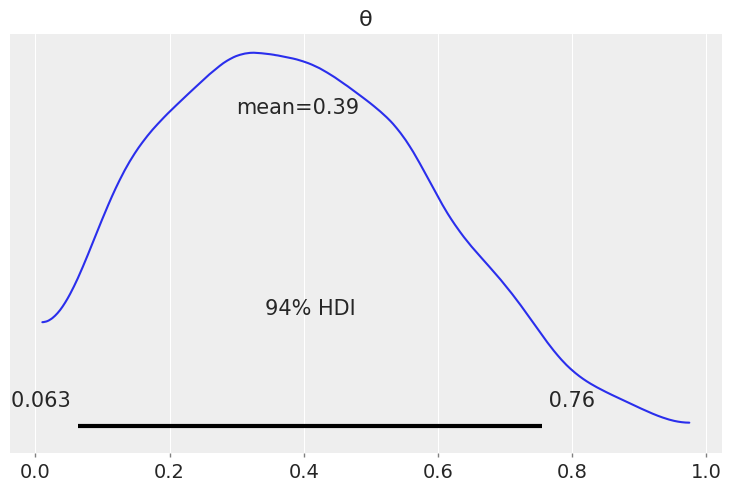

In [10]:
az.plot_posterior(trace)

##Posterior-based decisions